In [29]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [32]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,not spam,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,not spam,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,not spam,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,not spam,Rofl. Its true to its name,NaN,NaN,NaN


In [33]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [34]:
df.rename(columns={'v1': 'label', 'v2': 'msg'}, inplace=True)

In [35]:
df.sample(5)

,label,msg
1232,not spam,1's finish meeting call me.
1277,not spam,Dont put your phone on silent mode ok
4720,not spam,"Yup. Anything lor, if u dun wan it's ok..."
1262,spam,"Hungry gay guys feeling hungry and up 4 it, no..."
1228,spam,FREE entry into our ï¿½250 weekly comp just se...


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encoder = LabelEncoder()

In [38]:
df['label'] = encoder.fit_transform(df['label'])

In [39]:
df.sample(5)


,label,msg
2434,0,Uncle boye. I need movies oh. Guide me. Plus y...
4711,0,Thats cool princess! I will cover your face in...
4714,0,S:)8 min to go for lunch:)
1867,0,Mmmm ... Fuck ... Not fair ! You know my weakn...
1155,0,"Sorry man, accidentally left my phone on silen..."


In [40]:
if(df.duplicated().any()):
    df.drop_duplicates(inplace=True)

([<matplotlib.patches.Wedge at 0x73ff524b7800>,
 [Text(-1.014499732282844, 0.4251944181172162, 'not spam'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.4%'),
  Text(0.553363565906573, -0.231924047755212, '12.6%')])

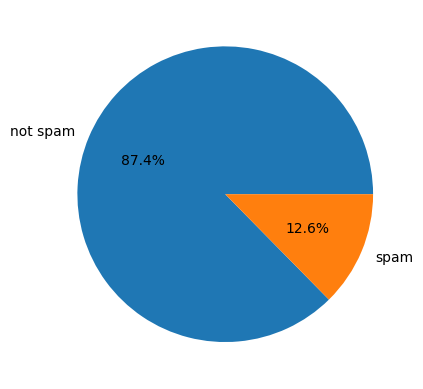

In [41]:
import matplotlib.pyplot as plt
import nltk 
plt.pie(df['label'].value_counts(), labels=['not spam', 'spam'], autopct='%1.1f%%')

In [42]:
# Add char, word, and sentence count columns
df['num_characters'] = df['msg'].apply(len)
df['num_words'] = df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df.sample(5)


,label,msg,num_characters,num_words,num_sentences
1380,0,i dnt wnt to tlk wid u,22,7,1
796,1,"Orange customer, you may now claim your FREE C...",160,35,5
1116,0,Hey... What time is your driving on fri? We go...,69,17,2
4499,0,Nvm take ur time.,17,5,1
5312,0,Here got ur favorite oyster... N got my favori...,121,25,2


In [44]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.257110,18.460824,1.965564
std,58.354011,13.326981,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.708592,17.128654,1.820195
std,56.450840,13.496222,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
import seaborn as sns

In [50]:
plt.figure(figsize=(15, 6))
sns.histplot()
plt.show()

<Figure size 1500x600 with 0 Axes>